# EDA : Lok Sabha Candidates, 2004 

## Extracting data

In [ ]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate

year = 2019


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)


def main():
    header = ["Candidate", "Party", "Criminal Cases", "Education", "Age", "Constituency",  "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    candidates = 0
    for i in range(1, 1050):
        try:
            print("Trying ID", i, end = ' => ')
            url = "https://myneta.info/LokSabha2019/index.php?action=show_candidates&constituency_id=" + str(i)
            html = urlopen(url)
            soup = BeautifulSoup(html,'html.parser')
            title = soup.title.text
            title = title.split()
            title = title[4:-3]
            title = " ".join(title)
            title = title.title()
            title = title.split(":")
            constituency = "+".join(title)
            title = ",".join(title)
            print("Saving", title, end = ' => ')
            table = soup.find("table", {"id": "table1"})
            rows = table.find_all('tr')
            total_rows = len(rows)
            for i in range(1, total_rows):
                col_data = []
                cols = rows[i].find_all('td')
                total_cols = len(cols)
                for i in range(0, 5):
                    col_data.append(cols[i].text)
                col_data.append(constituency)
                for i in range(5, total_cols):
                    col_data.append(inr_to_int(cols[i].text))                        
                data.append(col_data)
                candidates += 1
        except :
            print('ERROR')
        else:
            constituencies += 1
            print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', candidates, "candidates from", constituencies, "constituencies")
    df.to_csv(str(year) + '.csv', index=False)
    

main()

Trying ID 1 => Saving  => ERROR
Trying ID 2 => Saving  => ERROR
Trying ID 3 => Saving  => ERROR
Trying ID 4 => Saving  => ERROR
Trying ID 5 => Saving  => ERROR
Trying ID 6 => Saving  => ERROR
Trying ID 7 => Saving  => ERROR
Trying ID 8 => Saving  => ERROR
Trying ID 9 => ERROR
Trying ID 10 => Saving  => ERROR
Trying ID 11 => Saving  => ERROR
Trying ID 12 => Saving  => ERROR
Trying ID 13 => Saving  => ERROR
Trying ID 14 => Saving  => ERROR
Trying ID 15 => Saving  => ERROR
Trying ID 16 => Saving  => ERROR
Trying ID 17 => Saving  => ERROR
Trying ID 18 => Saving  => ERROR
Trying ID 19 => Saving  => ERROR
Trying ID 20 => Saving  => ERROR
Trying ID 21 => Saving  => ERROR
Trying ID 22 => Saving  => ERROR
Trying ID 23 => Saving  => ERROR
Trying ID 24 => Saving  => ERROR
Trying ID 25 => Saving  => ERROR
Trying ID 26 => Saving  => ERROR
Trying ID 27 => Saving  => ERROR
Trying ID 28 => Saving  => ERROR
Trying ID 29 => Saving  => ERROR
Trying ID 30 => Saving  => ERROR
Trying ID 31 => Saving  => ERR

## Visualizing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [3]:
data = pd.read_csv(str(year) + '.csv')
data

Candidate  Party  Criminal Cases      Education  Age  \
0     MANORANJAN BHAKTA   Winner     INC               0  Post Graduate   65   
1                      A K BISWAS    BSP               0       Graduate   61   
2                ASIT BARAN DUTTA    IND               0       Graduate   50   
3                 BISHNU PADA RAY    BJP               0       Graduate   54   
4                   DEEPAK BISWAS    IND               0      Not Given   28   
...                           ...    ...             ...            ...  ...   
3637                   Arjun Saha    BJP               0       Graduate   35   
3638              Braja Mohon Das    IND               0         Others   62   
3639                Chinta Sarkar  JD(S)               0      12th Pass   30   
3640            Gopal Chandra Das    INC               0  Post Graduate   35   
3641           Kartik Chandra Das    BSP               0       Graduate   51   

                                           Constituency  Total Assets  \
0     Andaman & Nicobar Islands + Andaman & Nicobar ...       5926740   
1     Andaman & Nicobar Islands + Andaman & Nicobar ...       7876500   
2     Andaman & Nicobar Islands + Andaman & Nicobar ...       3070000   
3     Andaman & Nicobar Islands + Andaman & Nicobar ...       1250619   
4     Andaman & Nicobar Islands + Andaman & Nicobar ...          3000   
...                                                 ...           ...   
3637                              Birbhum + West Bengal        515000   
3638                              Birbhum + West Bengal        357360   
3639                              Birbhum + West Bengal         29000   
3640                              Birbhum + West Bengal        119000   
3641                              Birbhum + West Bengal       3314000   

      Liabilities  
0          272061  
1           65000  
2               0  
3          128710  
4               0  
...           ...  
3637            0  
3638        20000  
3639            0  
3640            0  
3641            0  

[3642 rows x 8 columns]

In [4]:
data.describe()

Criminal Cases          Age  Total Assets   Liabilities
count     3642.000000  3642.000000  3.642000e+03  3.642000e+03
mean         0.373421    46.130972  1.146401e+07  6.454531e+05
std          1.809383    13.708530  2.561430e+08  1.146954e+07
min          0.000000     0.000000  0.000000e+00  0.000000e+00
25%          0.000000    37.000000  1.125120e+05  0.000000e+00
50%          0.000000    46.000000  8.450750e+05  0.000000e+00
75%          0.000000    55.750000  4.033326e+06  9.000000e+04
max         36.000000    94.000000  1.522455e+10  6.333000e+08

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       3642 non-null   object
 1   Party           3642 non-null   object
 2   Criminal Cases  3642 non-null   int64 
 3   Education       3642 non-null   object
 4   Age             3642 non-null   int64 
 5   Constituency    3642 non-null   object
 6   Total Assets    3642 non-null   int64 
 7   Liabilities     3642 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 227.8+ KB


In [6]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

188

In [7]:
candidates = np.size(data["Candidate"])
candidates

3642

In [8]:
candidates - np.size(data["Candidate"].unique())

70

In [9]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

22

In [10]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

2

In [11]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                                               Education            
SRIKANTADATTA NARASIMHARAJA WADIYAR                     Post Graduate            15224553998
ALIM                                                    5th Pass                  2000080500
MALOOK NAGAR                                            Graduate                   762437000
D.K. AUDIKESAVULU   Winner                              Not Given                  670576468
VED PRAKASH                                             12th Pass                  616557379
PALANISAMY, K. C.   Winner                              5th Pass                   546569007
PRENEET KAUR   Winner                                   Graduate                   412867297
V.M SINGH                                               Graduate                   407555000
MANABENDRA SHAH   Winner                                12th Pass                  347563683
VISHWANATH DUBEY                                        Post Graduate              27

In [12]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                             Education            
ARUN KUMAR                            Graduate Professional    633300000
VED PRAKASH                           12th Pass                238262560
SAIDUZZAMAN                           Post Graduate             75683504
PALANISAMY, K. C.   Winner            5th Pass                  63920476
LALU PRASAD   Winner                  Graduate Professional     44082800
SHIV KHERA                            Graduate                  34825000
PRALHAD JOSHI   Winner                Graduate                  32587745
MADHU GOUD YASKHI   Winner            Post Graduate             32560000
CHETAN CHAUHAN                        Graduate                  29825340
GOVINDA   Winner                      Graduate                  25000000
KULDEEP BISHNOI   Winner              Graduate                  21865304
C UDAI BHASKER                        Not Given                 21438399
MALLIKARJUN S S                       Graduate                  

In [13]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

Candidate Party  Criminal Cases      Education  Age  \
0     MANORANJAN BHAKTA   Winner    INC               0  Post Graduate   65   
1                      A K BISWAS   BSP               0       Graduate   61   
2                ASIT BARAN DUTTA   IND               0       Graduate   50   
3                 BISHNU PADA RAY   BJP               0       Graduate   54   
4                   DEEPAK BISWAS   IND               0      Not Given   28   
...                           ...   ...             ...            ...  ...   
3634              Dhananjoy Ghosh   INC               0       Graduate   47   
3637                   Arjun Saha   BJP               0       Graduate   35   
3638              Braja Mohon Das   IND               0         Others   62   
3640            Gopal Chandra Das   INC               0  Post Graduate   35   
3641           Kartik Chandra Das   BSP               0       Graduate   51   

                                           Constituency  Total Assets  \
0     Andaman & Nicobar Islands + Andaman & Nicobar ...       5926740   
1     Andaman & Nicobar Islands + Andaman & Nicobar ...       7876500   
2     Andaman & Nicobar Islands + Andaman & Nicobar ...       3070000   
3     Andaman & Nicobar Islands + Andaman & Nicobar ...       1250619   
4     Andaman & Nicobar Islands + Andaman & Nicobar ...          3000   
...                                                 ...           ...   
3634                               Bolpur + West Bengal        939568   
3637                              Birbhum + West Bengal        515000   
3638                              Birbhum + West Bengal        357360   
3640                              Birbhum + West Bengal        119000   
3641                              Birbhum + West Bengal       3314000   

      Liabilities  
0          272061  
1           65000  
2               0  
3          128710  
4               0  
...           ...  
3634        14000  
3637            0  
3638        20000  
3640            0  
3641            0  

[2344 rows x 8 columns]

In [14]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

Candidate
Party           
IND         1257
INC          380
BSP          348
BJP          331
SAD           10

<AxesSubplot:xlabel='Party'>

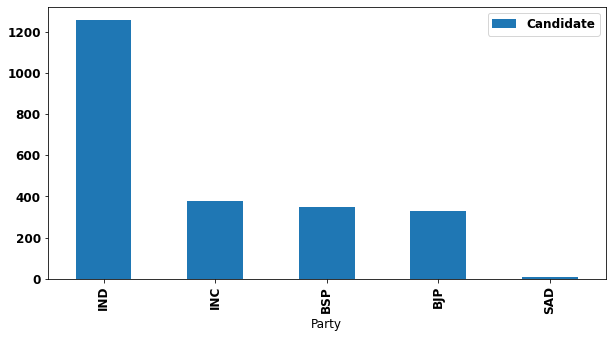

In [15]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

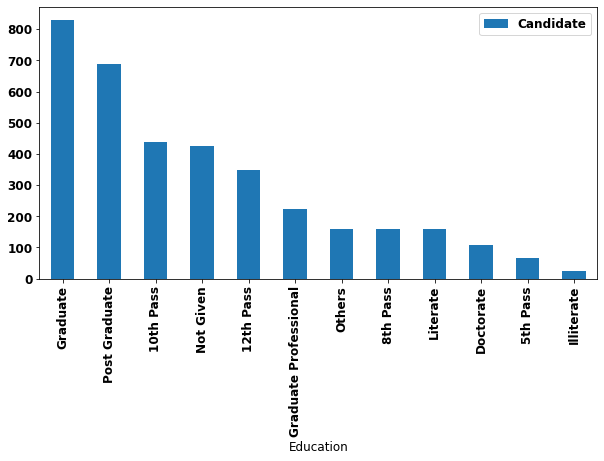

In [16]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [17]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                         
Party                       BJP   BSP    INC    IND  SAD
Education                                               
10th Pass                  23.0  46.0   25.0  194.0  2.0
12th Pass                  30.0  32.0   25.0  123.0  0.0
5th Pass                    0.0   6.0    3.0   41.0  0.0
8th Pass                    4.0  10.0    5.0   92.0  0.0
Doctorate                  15.0   8.0   14.0   22.0  0.0
Graduate                  103.0  87.0  111.0  226.0  1.0
Graduate Professional      39.0  17.0   36.0   40.0  4.0
Illiterate                  0.0   0.0    0.0   17.0  0.0
Literate                    6.0  12.0    8.0   77.0  0.0
Not Given                  14.0  38.0   22.0  231.0  0.0
Others                     12.0  17.0    6.0   62.0  1.0
Post Graduate              85.0  75.0  125.0  146.0  2.0

In [18]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

Candidate                    Constituency  \
0                    ATIQUE AHAMAD   Winner          Phulpur + Uttar Pradesh   
1                          ANAND MOHAN SINGH                 Sheohar + Bihar   
2                         MITRASEN   Winner         Faizabad + Uttar Pradesh   
3            RAJESH RANJAN ALIAS PAPPU YADAV                  Purnea + Bihar   
4   AKSHAY PRATAP SINGH (GOPAL JI)   Winner       Pratapgarh + Uttar Pradesh   
5                          AWADESH KU MANDAL                  Purnea + Bihar   
6                                   AKHILESH     Maharajganj + Uttar Pradesh   
7                   P. KARUNAKARAN   Winner               Kasaragod + Kerala   
8                        RANVEER SINGH GUDHA           Jhunjhunu + Rajasthan   
9             MOHAMMAD SHAHABUDDIN   Winner                    Siwan + Bihar   
10                     BRAHMESHWAR NATH SIGH                   Arrah + Bihar   
11                     SURAJ SINGH   Winner                    Balia + Bihar   
12                        VIJAY KUMAR SHUKLA                Vaishali + Bihar   
13           AHIR HANSRAJ GANGARAM   Winner         Chandrapur + Maharashtra   
14                              RANVIR YADAV                   Banka + Bihar   
15              CHANDRAKANT KHAIRE   Winner         Aurangabad + Maharashtra   
16   TUKARAM GANPATRAO RENGE PATIL   Winner           Parbhani + Maharashtra   
17                             SUKHRAM ORAON           Singhbhum + Jharkhand   
18          ELANGOVAN, E. V. K. S.   Winner   Gobichettipalayam + Tamil Nadu   
19                       GHISA LAL AGARWALLA                  Tezpur + Assam   
20                              RAJAN TIWARI                 Bettiah + Bihar   
21                PRABHUNATH SINGH   Winner              Maharajganj + Bihar   
22              BHALCHANDRA YADAVA   Winner       Khalilabad + Uttar Pradesh   
23                 ASHOK KUMAR SINGH CHANDEL        Hamirpur + Uttar Pradesh   
24                     TASLIMUDDIN   Winner               Kishanganj + Bihar   

         Party      Education  Criminal Cases  
0           SP       8th Pass              36  
1         BPSP      12th Pass              32  
2          BSP      12th Pass              27  
3        LJNSP      12th Pass              27  
4           SP       Literate              26  
5          IND       Literate              24  
6           SP       Graduate              23  
7          CPM  Post Graduate              20  
8        LJNSP       Graduate              19  
9          RJD      Doctorate              19  
10         IND      12th Pass              19  
11       LJNSP       Literate              17  
12         IND       Graduate              16  
13         BJP      10th Pass              16  
14          SP      10th Pass              15  
15         SHS       Graduate              13  
16         SHS  Post Graduate              13  
17  AJSU Party      10th Pass              13  
18         INC       Graduate              13  
19         BJP      12th Pass              12  
20         IND       8th Pass              11  
21       JD(U)      12th Pass              11  
22         BSP       Graduate              10  
23         BSP       Graduate              10  
24         RJD       Literate               9

In [19]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

Candidate  \
0       MANORANJAN BHAKTA   Winner    
1          BALWANT SINGH RAMOOWALIA   
2              RABINDER SINGH SOHIL   
3                RASHPAL SINGH GILL   
4   SUKHDEV SINGH DHINDSA   Winner    
5                     ARVIND KHANNA   
6   PARAMJIT KAUR GULSHAN   Winner    
7             BHAGWANT SINGH SAMAON   
8                      GURNAM SINGH   
9                      JASVIR SINGH   
10          KAUSHALYA CHAMAN BHAURA   
11                  KANWALJIT SINGH   
12                      ASHOK KUMAR   
13                    HARMAIL SINGH   
14                  KARAN KAUR BRAR   
15                    NAVNEET KUMAR   
16                     NIRMAL SINGH   
17                         SANT RAM   
18                    SUKHBIR SINGH   
19            AJAY DANIEL ( TINKU )   
20                 DHIAN SINGH MAND   
21               JAGMEET SINGH BRAR   
22                MAHINDERJIT SINGH   
23                     GURLAL SINGH   
24          MOHAN SINGH FALIAN WALA   

                                         Constituency  \
0   Andaman & Nicobar Islands + Andaman & Nicobar ...   
1                                   Ludhiana + Punjab   
2                                   Ludhiana + Punjab   
3                                   Ludhiana + Punjab   
4                                    Sangrur + Punjab   
5                                    Sangrur + Punjab   
6                                   Bhatinda + Punjab   
7                                   Bhatinda + Punjab   
8                                   Bhatinda + Punjab   
9                                   Bhatinda + Punjab   
10                                  Bhatinda + Punjab   
11                                   Patiala + Punjab   
12                                  Faridkot + Punjab   
13                                  Faridkot + Punjab   
14                                  Faridkot + Punjab   
15                                  Faridkot + Punjab   
16                                  Faridkot + Punjab   
17                                  Faridkot + Punjab   
18                                  Faridkot + Punjab   
19                                 Ferozepur + Punjab   
20                                 Ferozepur + Punjab   
21                                 Ferozepur + Punjab   
22                                 Ferozepur + Punjab   
23                                  Faridkot + Punjab   
24                                 Ferozepur + Punjab   

                           Party      Education  Criminal Cases  
0                            INC  Post Graduate               0  
1                            LBP  Post Graduate               0  
2                            BSP  Post Graduate               0  
3                            IND       Graduate               0  
4                            SAD       Graduate               0  
5                            INC         Others               0  
6                            SAD  Post Graduate               0  
7                     CPI(ML)(L)         Others               0  
8                            BSP  Post Graduate               0  
9                            IND       Graduate               0  
10                           CPI       Graduate               0  
11                           SAD         Others               0  
12                         JD(S)      Not Given               0  
13                           IND      10th Pass               0  
14                           INC       Graduate               0  
15                           SHS      12th Pass               0  
16                         LJNSP      10th Pass               0  
17                           BSP      10th Pass               0  
18                           IND      12th Pass               0  
19                           IND      12th Pass               0  
20  SAD(A)(Simranjit Singh Mann)         Others               0  
21                           INC       Graduate               0  
22        

<AxesSubplot:xlabel='Party'>

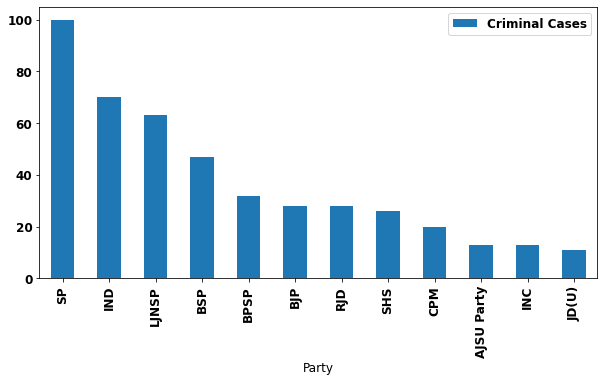

In [20]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [21]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

Candidate  \
0                 SRIKANTADATTA NARASIMHARAJA WADIYAR   
1                                                ALIM   
2                                        MALOOK NAGAR   
3                         D.K. AUDIKESAVULU   Winner    
4                                         VED PRAKASH   
5                         PALANISAMY, K. C.   Winner    
6                              PRENEET KAUR   Winner    
7                                           V.M SINGH   
8                           MANABENDRA SHAH   Winner    
9                                    VISHWANATH DUBEY   
10                               DHARMENDRA   Winner    
11                           PRATIBHA SINGH   Winner    
12                                       KRISHNAPPA M   
13  KISHORE CHANDRA SURYANARAYANA DEO VYRICHERLA  ...   
14                                    MALLIKARJUN S S   
15                                       PINAKI MISRA   
16                       RANA GURJEET SINGH   Winner    
17                               SUNIL DUTT   Winner    
18                                      NARESH GUJRAL   
19                                       N A MOHAMMED   
20                         MONI KUMAR SUBBA   Winner    
21                          CHIDAMBARAM, P.   Winner    
22                                 PRAVEEN SINGH ARON   
23                                   MADDI LAKSHMAIAH   
24                              KAPIL SIBAL   Winner    

                                         Constituency Party  Total Assets  
0                                  Mysore + Karnataka   INC   15224553998  
1   Chandni Chowk + National Capital Territory Of ...   IND    2000080500  
2                              Meerut + Uttar Pradesh   RLD     762437000  
3                           Chittoor + Andhra Pradesh   TDP     670576468  
4                               Bharatpur + Rajasthan   INC     616557379  
5                                  Karur + Tamil Nadu   DMK     546569007  
6                                    Patiala + Punjab   INC     412867297  
7                            Pilibhit + Uttar Pradesh   INC     407555000  
8                         Tehri Garhwal + Uttaranchal   BJP     347563683  
9                           Jabalpur + Madhya Pradesh   INC     277530906  
10                                Bikaner + Rajasthan   BJP     230326000  
11                           Mandi + Himachal Pradesh   INC     230288018  
12                        Bangalore South + Karnataka   INC     228924447  
13                     Parvathipuram + Andhra Pradesh   INC     220678000  
14                              Davangere + Karnataka   INC     210693494  
15                                      Puri + Orissa   INC     207245000  
16                                 Jullundur + Punjab   INC     205828008  
17                    Mumbai North West + Maharashtra   INC     204321510  
18                                 Jullundur + Punjab   SAD     192876742  
19                                 Kasaragod + Kerala   INC     188527614  
20                                     Tezpur + Assam   INC     186443565  
21                             Sivaganga + Tamil Nadu   INC     179861587  
22                           Bareilly + Uttar Pradesh   INC     177736104  
23                      Narasaraopet + Andhra Pradesh   TDP     169062689  
24  Chandni Chowk + National Capital Territory Of ...   INC     158850000

<AxesSubplot:xlabel='Party'>

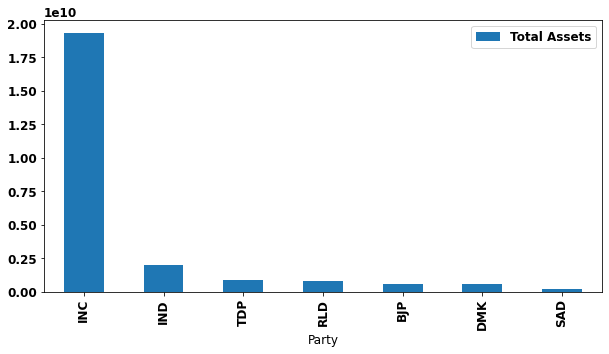

In [22]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 